# Prosper Loan Data Exploration
## by Chizaram Emenyonu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people. <br />
This dataset contains 113,937 loans with 81 columns for each loan. These columns includes borrower income, borrower rate, current loan status, loan amount, and so on. <br /> 
This investigation will be analyzing factors that influence borrow's APR and how each loan were taken by what type of borrowers.
Gotten from: https://www.prosper.com/about



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Configuring Pandas; expand maximum number of columns and row displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore") 
print('complete')

complete


In [2]:
# Load the dataset
df_complete = pd.read_csv('prosperLoanData.csv')
df_complete.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# DataFrame summary showing datatypes and full info
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<a id='clean'></a>
## Cleaning

>There are a lot of variables in this dataset. I will take a subset of the variables for my analysis

In [4]:
# Select interested variables
variables = ['ListingCreationDate', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingCategory (numeric)', 
             'ProsperRating (Alpha)','ProsperScore', 'Occupation', 'IncomeVerifiable', 'EmploymentStatus', 'IsBorrowerHomeowner', 
             'LoanStatus','CreditScoreRangeLower', 'CurrentCreditLines', 'IncomeRange','BorrowerRate','StatedMonthlyIncome',
             'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'CreditScoreRangeUpper','BorrowerState', 'Term', 'BorrowerAPR']

In [5]:
# View the created dataframe
df_complete[variables].head()

,ListingCreationDate,LoanOriginalAmount,LoanOriginationDate,ListingCategory (numeric),ProsperRating (Alpha),ProsperScore,Occupation,IncomeVerifiable,EmploymentStatus,IsBorrowerHomeowner,LoanStatus,CreditScoreRangeLower,CurrentCreditLines,IncomeRange,BorrowerRate,StatedMonthlyIncome,OpenRevolvingAccounts,DebtToIncomeRatio,CreditScoreRangeUpper,BorrowerState,Term,BorrowerAPR
0,2007-08-26 19:09:29.263000000,9425,2007-09-12 00:00:00,0,NaN,NaN,Other,True,Self-employed,True,Completed,640.0,5.0,"$25,000-49,999",0.1580,3083.333333,1,0.17,659.0,CO,36,0.16516
1,2014-02-27 08:28:07.900000000,10000,2014-03-03 00:00:00,2,A,7.0,Professional,True,Employed,False,Current,680.0,14.0,"$50,000-74,999",0.0920,6125.000000,13,0.18,699.0,CO,36,0.12016
2,2007-01-05 15:00:47.090000000,3001,2007-01-17 00:00:00,0,NaN,NaN,Other,True,Not available,False,Completed,480.0,NaN,Not displayed,0.2750,2083.333333,0,0.06,499.0,GA,36,0.28269
3,2012-10-22 11:02:35.010000000,10000,2012-11-01 00:00:00,16,A,9.0,Skilled Labor,True,Employed,True,Current,800.0,5.0,"$25,000-49,999",0.0974,2875.000000,7,0.15,819.0,GA,36,0.12528
4,2013-09-14 18:38:39.097000000,15000,2013-09-20 00:00:00,2,D,4.0,Executive,True,Employed,True,Current,680.0,19.0,"$100,000+",0.2085,9583.333333,6,0.26,699.0,MN,36,0.24614


In [6]:
# view the statistics
df_complete[variables].describe()

,LoanOriginalAmount,ListingCategory (numeric),ProsperScore,CreditScoreRangeLower,CurrentCreditLines,BorrowerRate,StatedMonthlyIncome,OpenRevolvingAccounts,DebtToIncomeRatio,CreditScoreRangeUpper,Term,BorrowerAPR
count,113937.00000,113937.000000,84853.000000,113346.000000,106333.000000,113937.000000,1.139370e+05,113937.00000,105383.000000,113346.000000,113937.000000,113912.000000
mean,8337.01385,2.774209,5.950067,685.567731,10.317192,0.192764,5.608026e+03,6.96979,0.275947,704.567731,40.830248,0.218828
std,6245.80058,3.996797,2.376501,66.458275,5.457866,0.074818,7.478497e+03,4.63097,0.551759,66.458275,10.436212,0.080364
min,1000.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,19.000000,12.000000,0.006530
25%,4000.00000,1.000000,4.000000,660.000000,7.000000,0.134000,3.200333e+03,4.00000,0.140000,679.000000,36.000000,0.156290
50%,6500.00000,1.000000,6.000000,680.000000,10.000000,0.184000,4.666667e+03,6.00000,0.220000,699.000000,36.000000,0.209760
75%,12000.00000,3.000000,8.000000,720.000000,13.000000,0.250000,6.825000e+03,9.00000,0.320000,739.000000,36.000000,0.283810
max,35000.00000,20.000000,11.000000,880.000000,59.000000,0.497500,1.750003e+06,51.00000,10.010000,899.000000,60.000000,0.512290


In [7]:
# Are there duplicates
sum(df_complete[variables].duplicated())

0

In [8]:
# Total number of columns containing null values
df_complete[variables].isnull().sum()

ListingCreationDate              0
LoanOriginalAmount               0
LoanOriginationDate              0
ListingCategory (numeric)        0
ProsperRating (Alpha)        29084
ProsperScore                 29084
Occupation                    3588
IncomeVerifiable                 0
EmploymentStatus              2255
IsBorrowerHomeowner              0
LoanStatus                       0
CreditScoreRangeLower          591
CurrentCreditLines            7604
IncomeRange                      0
BorrowerRate                     0
StatedMonthlyIncome              0
OpenRevolvingAccounts            0
DebtToIncomeRatio             8554
CreditScoreRangeUpper          591
BorrowerState                 5515
Term                             0
BorrowerAPR                     25
dtype: int64

In [9]:
df = df_complete[variables]

In [10]:
# Rename columns
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [11]:
# Convert date columns from strings to dates
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

In [12]:
# Removing all numeric values from the ListingCategory column
list_cat = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
            4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
            9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
           13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
           17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory'].map(list_cat)

In [13]:
# Convert ProsperRating from strings to categorical datatype
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
correct_rating = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rating)
df['ProsperRating'] = df['ProsperRating'].astype(correct_rating)

In [14]:
# Occupation Unique Values
df['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [15]:
#Search for null values
null_values = df.Occupation.isnull().sum()
print('There are {} duplicate records in the dataset'.format(null_values))

There are 3588 duplicate records in the dataset


In [16]:
# Filling null values with Not Specified
df['Occupation'] = df['Occupation'].fillna('Not Specified')

In [17]:
#ProsperRating and BorrowerAPR are 2 important variables for this analysis. I will select only rows with not null values
empty_values = ['BorrowerAPR', 'ProsperRating']

for values in empty_values:
    df = df[df[values].notnull()]

In [18]:
df.shape

(84853, 22)

### What is the structure of your dataset?
> My dataset was initially a loan database of 113937(rows) with 81 columns(variables). In each row(loan listing), there is a lot of insight that can be gotten on the situations surrounding each loan in the dataset. However, to be able to carry out a good analysis, I selected a subset of these variables.  <br /> 
The present data frame contains 84853 rows (84853 loans) with 22 features. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?
> The dataset currently contains loads of information. However, I am interested in finding out:
> - The factors that may cause people to take loans.
> - The different factors that can influence the amount a borrower can get. ProsperRating, Occupation, EmploymentStatus etc.
> - The loans size borrowers take out from Prosper?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> There are so many features to explore. However I think the following features will help in my analysis; `ProsperScore`, `LoanStatus`, `BorrowerState`, `isBorrowerHomeowner`, `IncomeRange`, `BorrowerAPR`, `ProsperRating`, `EmploymentStatus`, `IncomeVerifiable`.... <br/>
My interested features are however not limited to this. Additional features might be required.

The Question-Visualization-Observations frame work will be used throughout the exploration process. For this exploration phase, I will be exploring the different variables in the dataset to see how they're distributed and to generally understand their importance in the dataset.

### Creating Functions To Be Used

In [19]:
# Function to call the figsize
def fig_size(a,b):
    # calling figsize parameters
    return plt.figure(figsize=(a,b))

In [20]:
#This function gives chart title, x and y axis. It is created to avoid repetition
def pltlabels(a,b,c):
    return plt.title(a),plt.xlabel(b),plt.ylabel(c)

In [21]:
color=sb.color_palette()[0]

<a id='univariate'></a>
## Univariate Exploration
> In this section, i will look at how some of my interested variables are distributed using charts.
### Prosper Score
### Question:
The ProsperScore column calculates the risk score built using historical Prosper data. Which ProsperScore has the highest number of borrowers?

### Visualization:

In [22]:
# Make a count to know the Sore with the highest number
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

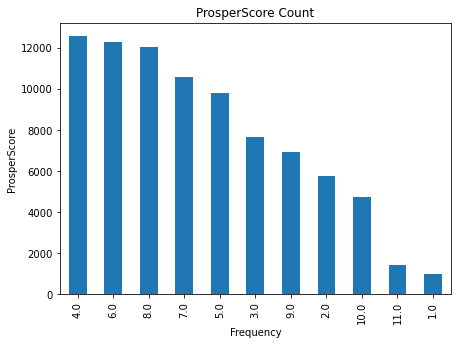

In [23]:
# Plot a barchart for visualization
fig_size(7, 5)
df_complete.ProsperScore.value_counts().plot(kind='bar')
pltlabels('ProsperScore Count', 'Frequency', 'ProsperScore');

### Observation:
The ProsperScore ranges from 1 to 11, with 11 being the lowest risk, to 1 being the highest risk. The high points are 4, 6, and 8. The lowest being 1. This shows that borrowers with the highest risk score are the least population in the dataset. Most borrowers fall within 4-8 risk score.

### Loan Status
### Question:
What is the distrubution of loan status across listings in the dataset. Are borrowers settling their loans?<br/>
### Visualization:

In [24]:
loan_stats = df['LoanStatus'].unique()
print(loan_stats)

['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)']


There are a lot of Past Due dates. So I will merge all of them into one unique value called **Past Due**

In [25]:
# Merging all Past Due dates 
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable. This is gotten from the data dictionary
dict_LoanStatus = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

status_order = pd.api.types.CategoricalDtype(ordered = True, categories = dict_LoanStatus)

df['LoanStatus'] = df['LoanStatus'].astype(status_order)

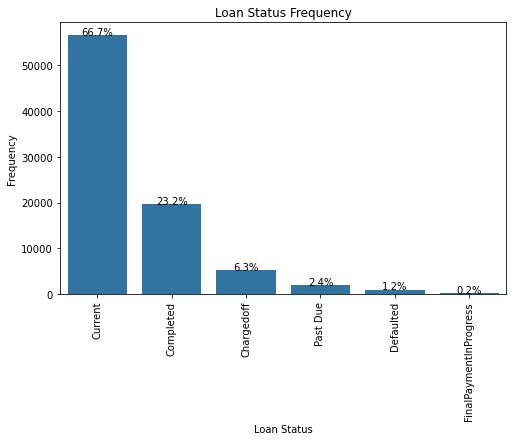

In [26]:
# Plot barchart for visualization
count_status = df['LoanStatus'].value_counts()
order_status = count_status.index
loans = df['LoanStatus'].value_counts().sum()

fig_size(8, 5)
sb.countplot(data=df, x='LoanStatus', color=color, order = order_status)
pltlabels('Loan Status Frequency', 'Loan Status', 'Frequency');

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = count_status[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loans)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Observation:
From the visualization above, the dataset is majorly populated with current loans which takes 66.7% of the total loans (over 50,000 current loans) and they are serviced by Prosper's borrowers. Completed loans take 23% (about 20,000 loans) of the total loans have been completed. Charged off loans are about 5,000 and they take 6% of the loans. 1.2% have defaulted. The remaining 2.4% of loans has the status Past Due and was grouped under a single status: Past Due.

### Borrowers APR
### Question:
What is the distrbution of Borrower APR values in the dataset?
### Visualization:

In [27]:
# check where APR has the most counts
df.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
Name: BorrowerAPR, dtype: int64

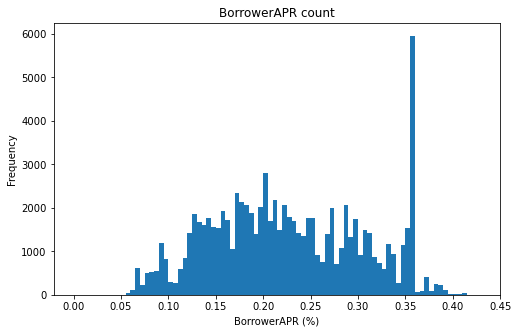

In [28]:
# see the counts for all BorrowerAPR values
fig_size(8, 5)
bins = np.arange(0, df['BorrowerAPR'].max(), 0.005)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
pltlabels('BorrowerAPR count', 'BorrowerAPR (%)', 'Frequency');
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

### Observation:
The highest BorrowerAPR is 0.35797% with 3672 counts. The lowest rate is 0.35356% with just 721 count. The Borrower APR plot has a multimodal distribution, with different peaks. 

### Employment Status
### Question:
What is the distribution of Employment Status accross the borrowers. What is the status of people with the most loans?
### Visualization:

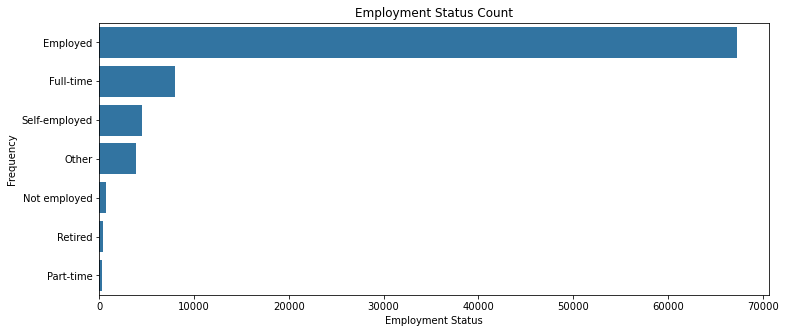

In [29]:
# Plot EmploymentStatus chat
fig_size(12, 5)
employment_stat = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df, y='EmploymentStatus', order = employment_stat, color=color)
pltlabels('Employment Status Count', 'Employment Status', 'Frequency');

### Observation:
Employed individuals take the highest count of borrowers. This makes sense because one would need a source of income to pay off borrowed loans. It would be difficult to get a loan without a job. It is however surprising that people that did not specify their employment status (Other) have more count than borrowers with part-time jobs. 

### Occupation
### Question:
What is the Occupation of borrowers with the most loans?
### Visualization:

In [30]:
occupation_count = df.Occupation.value_counts()
print(occupation_count)

Other                                 21317
Professional                          10542
Executive                              3468
Computer Programmer                    3236
Teacher                                2888
Analyst                                2735
Administrative Assistant               2708
Accountant/CPA                         2574
Sales - Commission                     2350
Skilled Labor                          2180
Nurse (RN)                             2159
Clerical                               2116
Sales - Retail                         2029
Retail Management                      2001
Truck Driver                           1366
Not Specified                          1333
Construction                           1326
Police Officer/Correction Officer      1277
Laborer                                1217
Civil Service                          1139
Engineer - Mechanical                  1135
Food Service Management                1005
Engineer - Electrical           

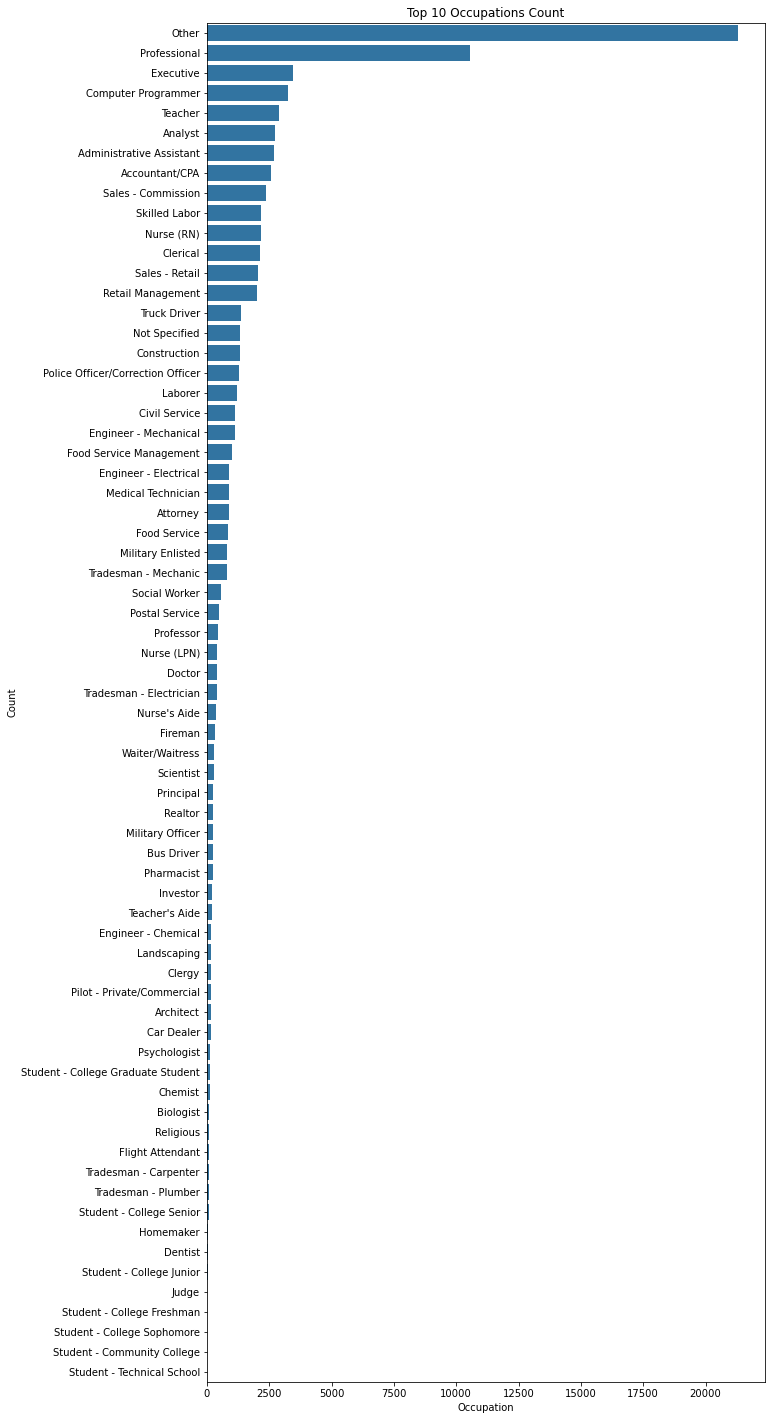

In [31]:
fig_size(10,25)
order = occupation_count.index
sb.countplot(data=df, y='Occupation', color=color, order=order)
pltlabels('Top 10 Occupations Count', 'Occupation', 'Count');

### Observation
Surprisingly,  21317 loans were given out to borrowers that did not disclose their oppcupation (**Others**). Earlier, I filled rows with empty Occupation values with **Unknown**, and it is also surprising to see that these individuals had access to loans (Not Specified - 1333).<br/>
Most borrowers on Prosper indicate to be Professionals, Computer Programmer, Administrative Assistant, Executive, Teacher, Analyst. There are also loan packages for Students

### Occupation vs BorrowerAPR
### Question:
Which occupation has the highest BorrowerAPR? I'll select the top 10 occupations with high APR means
### Visualization:

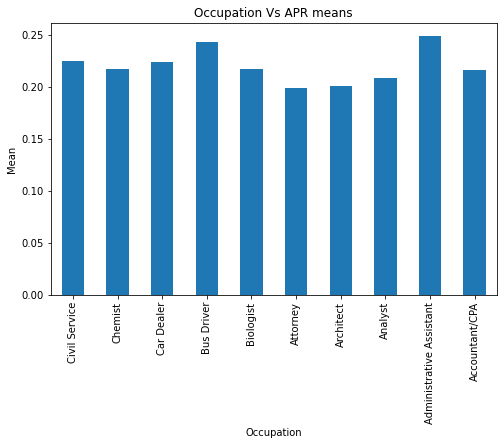

In [32]:
# bar plot for APR means for each top 10 occupations.
Top_Occupation = df.groupby('Occupation').BorrowerAPR.mean()[9::-1]
fig_size(8, 5)
Top_Occupation.plot(kind = 'bar')
pltlabels('Occupation Vs APR means', 'Occupation', 'Mean');

### Observation
All these occupations have about same BorrowerAPR values. Therefore occupation is not the best factor to analyze the BorrowerAPR, because it is unclear and many other reasons should also be considers to be analyzed.

### Loan Terms
### Question:
What is the most commonly requested loan term?
### Visualization:

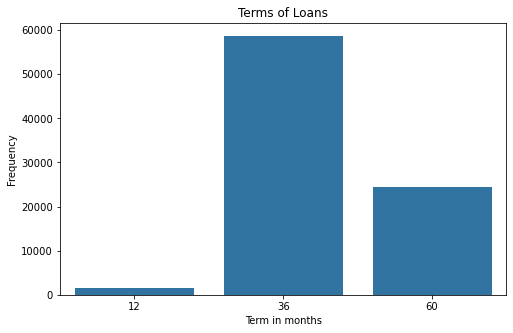

In [33]:
# Plot term of loans
fig_size(8, 5)
sb.countplot(data = df, x='Term', color=color)
pltlabels('Terms of Loans', 'Term in months', 'Frequency');

### Observation
There are 3 types of loans: 1 year, Medium term loans (3 years) and Long term loans (5 years). 
Most of the loans taken were for 3 years(36 months), while 12 months loan had the least frequency. With some loans being for 5 years(60 months).

### Wages Group
### Question:
I will group the wage group column into 3 groups (Low, Medium and High). This is to investigate which wage group has the highest number of requested loans?
### Visualization:

Medium    60037
High      16344
Low        8472
Name: WageGroup, dtype: int64


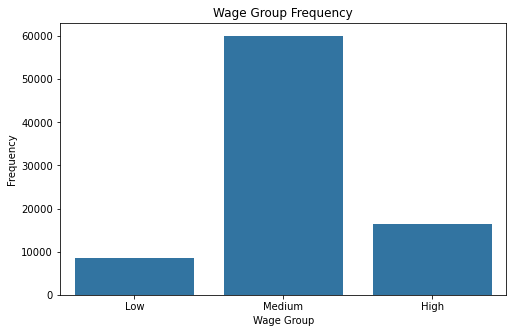

In [34]:
# create a group function
def group(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
df['WageGroup'] = df.apply(group, axis=1)
wagegroup_count = df.WageGroup.value_counts()
print(wagegroup_count)

# convert string to ordinal category type
ordinal_class = ['Low', 'Medium', 'High']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df['WageGroup'] = df['WageGroup'].astype(ordered_variable)

# Plot the new variable
fig_size(8, 5)
sb.countplot(data = df, x = 'WageGroup', color = color)
pltlabels('Wage Group Frequency', 'Wage Group', 'Frequency');

### Observation:
The middle class (people with an average monthly salary between 2500 and 8000 dollars) have taken the highest count of loans which is about 60,037 loans. I expected the low earners to have the highest count of loans but surprisingly, they have the lowest count at 8472 loans. This may be due to inability to pay back loans.

### Income Verifiable
### Question:
How is the income verifiable variable distributed? Does a verifiable income influence a loan request?
### Visualization:

True     77520
False     7333
Name: IncomeVerifiable, dtype: int64


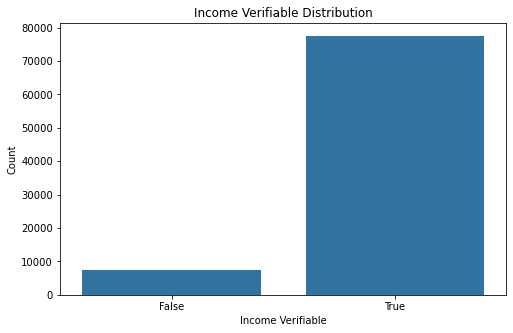

In [35]:
fig_size(8, 5)
income_verifiable = df.IncomeVerifiable.value_counts()
print(income_verifiable)
sb.countplot(data=df, x='IncomeVerifiable', color = color)
pltlabels('Income Verifiable Distribution', 'Income Verifiable', 'Count');

### Observation:
As expected, majority of the borrowers (77520 borrowers) have a verifiable means of income, this is needed to ascertain if the borrower will be able to service the loan. But surprisingly, some individuals without any verifiable means of income (7333) were granted loans.

### Loan Original Amount
### Question:
What is the most requested loan amount?
### Visualization:

In [36]:
df.LoanOriginalAmount.value_counts().nlargest(8)

4000     13233
15000    11460
10000     9816
2000      4591
5000      4224
3000      3451
20000     2928
25000     2788
Name: LoanOriginalAmount, dtype: int64

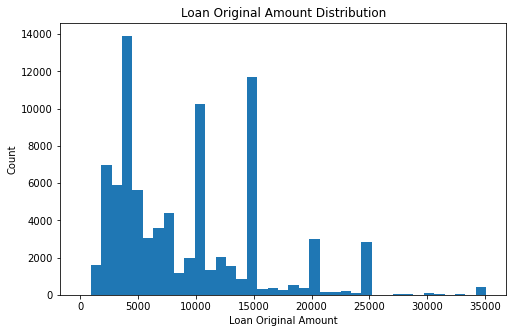

In [37]:
fig_size(8, 5)
bins = np.arange(0, df['LoanOriginalAmount'].max()+900, 900)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
pltlabels('Loan Original Amount Distribution', 'Loan Original Amount', 'Count');

### Observation:
The most frequently loaned amount is 4000 dollars with a count of 13233, 15000 dollars with a count of 11460 is the second most frequent loan amount. The loan amount with the least count is 25000 dollars (2788 count)

### IsBorrowerHomeowner
### Question:
How many percent of borrowers are homeowners?
### Visualization:

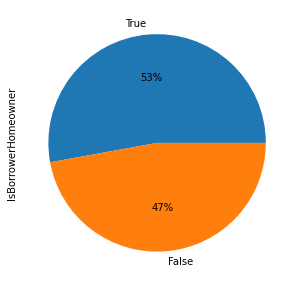

In [38]:
fig_size(8,5)
df.IsBorrowerHomeowner.value_counts().plot(kind='pie', autopct='%1.0f%%');

### Observation:
53% of loans belongs to a borrower who is a home owner while 43% belongs to non-homeowners. Homeowners requests for more loans on Prosper than their counterparts.

### Borrowers Location
### Question:
What is the distrubtion of borrower's state? Which state has the highest amount of borrowers?
### Visualization:

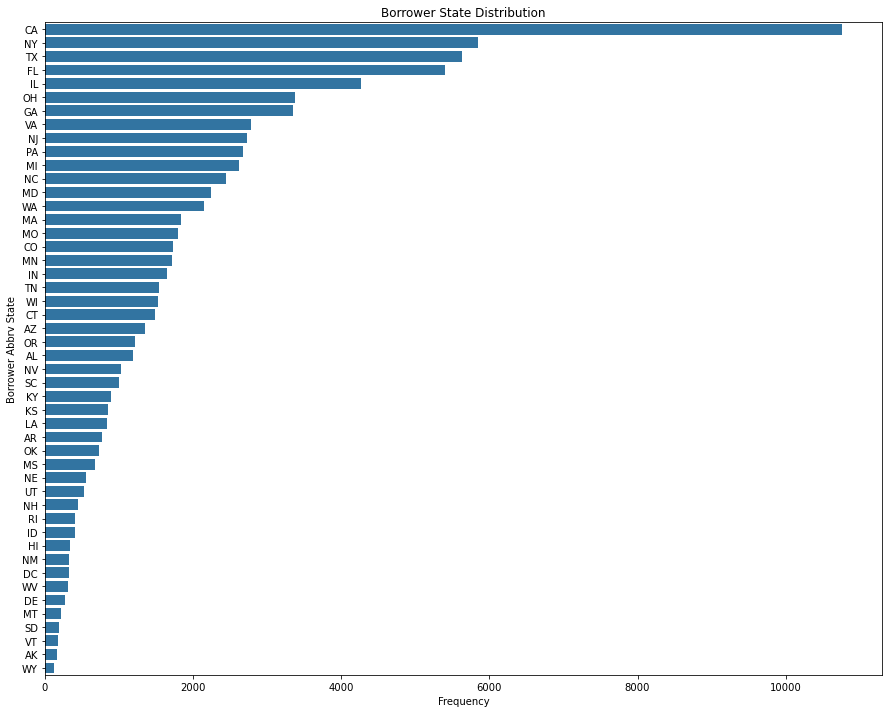

In [39]:
fig_size(15,12)
order = df.BorrowerState.value_counts().index
sb.countplot(data=df, y='BorrowerState', color=color, order=order)
pltlabels('Borrower State Distribution', 'Frequency', 'Borrower Abbrv State');

### Observation:
Most borrowers are from California. It has the highest number of borrowers by a wide margin. Wyoming has the lowest count of borrowers.

### Listing Category
### Question:
How is the ListingCategory Variable distributed?

### Visualization:

Debt Consolidation    53180
Other                  9218
Home Improvement       6801
Business               5298
Auto                   2237
Household Expenses     1996
Medical or Dental      1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Motorcycle              304
Student Use             274
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Not Available            20
Name: ListingCategory, dtype: int64


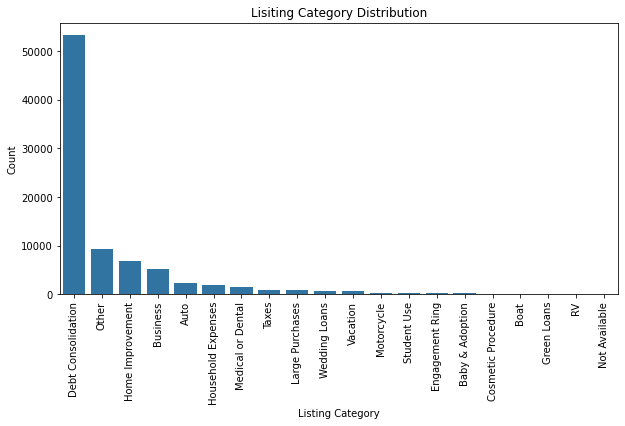

In [40]:
List_cat = df.ListingCategory.value_counts()
print(List_cat)
fig_size(10, 5)
order = List_cat.index
sb.countplot(data=df, x='ListingCategory', color = color, order=order)
plt.xticks(rotation=90)
pltlabels('Lisiting Category Distribution', 'Listing Category', 'Count');

### Observation:
From the visualization and count above, it can be seen that the highest reason people requested loans is Debt Consolidation with 53180 loans. People took more loans to pay off outstanding loans. Shocking right?. People also took out loans for other reasons like Medical appointments and Baby Adoption.

### Income Range
### Question:
What is the distribution of Income Range among the borrowers?

### Visualization:

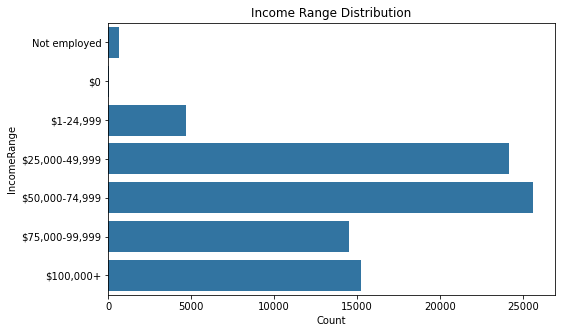

In [41]:
fig_size(8, 5)
order =  ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data = df, y = 'IncomeRange', color = color, order=order)
plt.xticks(rotation = 0)
pltlabels('Income Range Distribution', 'Count', 'IncomeRange');

### Observation:
Borrowers fell among differrent income ranges. Although the highest count of borrowers fell within the 50,000 - 74,999 range, Income Range doesn't seem to be a major factor as people earning over 100,000 still borrowed from Prosper.

### DebtToIncomeRatio
### Question:
What is the distribution of the values of DebtToIncomeRatio between the borrowers?
### Visualization:

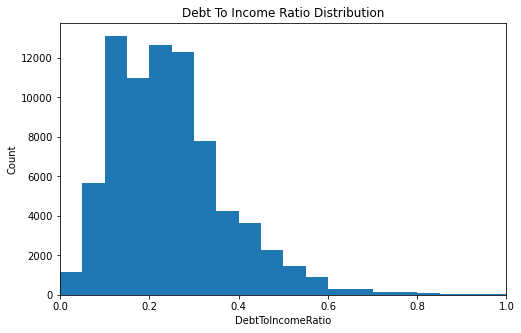

In [42]:
fig_size(8, 5)
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
pltlabels('Debt To Income Ratio Distribution', 'DebtToIncomeRatio', 'Count')
plt.xlim(0,1);

### Observation:
The distribution is skewed to the right. The chart above suggests that borrowers have a good balance between debt and income.

### ProsperRating
### Question:
What is the distribution of rating of borrowers on Prosper?
### Visualization:

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64


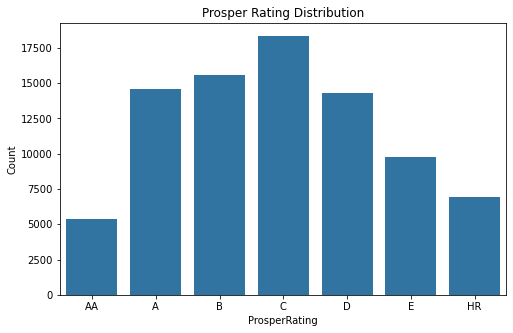

In [43]:
rating = df.ProsperRating.value_counts()
print(rating)
fig_size(8, 5)
sb.countplot(data = df, x = 'ProsperRating', color = color)
pltlabels('Prosper Rating Distribution', 'ProsperRating', 'Count');

### Observations:
Borrowers Rating are displayed in order from highest rating to lowest rating (AA, A, B, C, D, E, HR). The highest rating of AA has the lowest count 5372, Rating C received the highest count of 18345.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Surprisingly, 21317 loans were given out to borrowers that did not disclose their oppcupation they instead selected **Others** as their occupation. I filled rows with empty Occupation values with **Not Specified**, and it is also surprising to see that these individuals had access to loans (Not Specified - 1333). I however did not see any need to do transformations.<br/>
Also, a lot of people didn't specify why they requested for loans and some other people specified **Other** as their reason. This wasn't a major issue as they didn't make up majority of the population.

<a id='bivariate'></a>
## Bivariate Exploration
I'll continue my analysis by trying to find interesting relationships that show how one variable affects another variable. I am more interested in finding out how the IncomeRange and BorrrowerAPR features relate to selected variables

### Question:
What is relationship between BorrowerAPR and IncomeRange?
### Visualization:

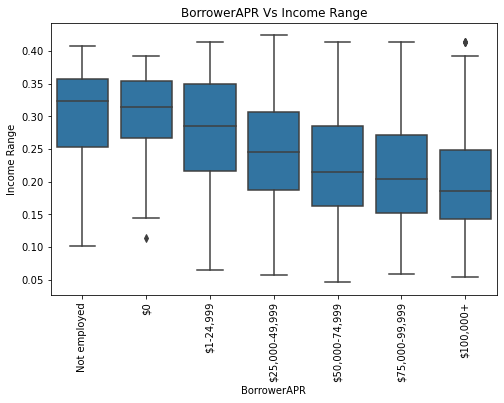

In [44]:
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
fig_size(8,5)
sb.boxplot(data=df, x='IncomeRange', y='BorrowerAPR', color=color, order=order)
plt.xticks(rotation=90)
pltlabels('BorrowerAPR Vs Income Range','BorrowerAPR', 'Income Range');

### Observation:
The plot shows that Borrower APR reduces as the Income Range of borrowers increase. This means that borrrowers that have high income enjoy lower interest rates on the platform. This make sense becasue people with higher income tend to be more reliable and therefore given lower BorrowerAPR.

### Question:
What is relationship between BorrowerAPR and ProsperRating?
### Visualization:

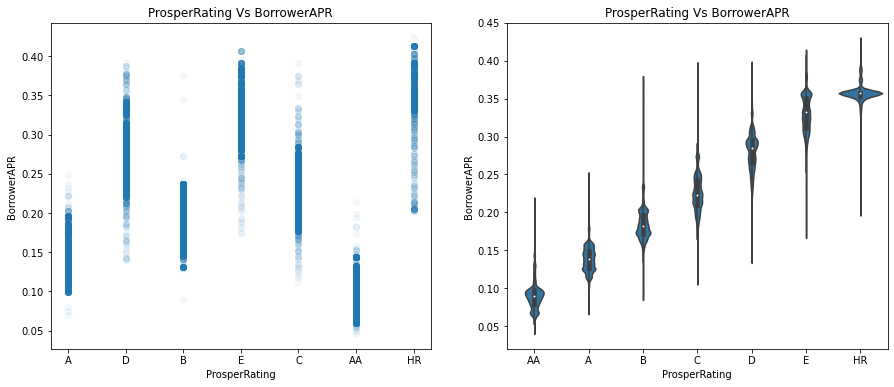

In [45]:
fig_size (15, 6) 
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'ProsperRating', y = 'BorrowerAPR', alpha =  0.05)
pltlabels('ProsperRating Vs BorrowerAPR','ProsperRating', 'BorrowerAPR');

plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='ProsperRating', y='BorrowerAPR', color=color)
pltlabels('ProsperRating Vs BorrowerAPR','ProsperRating', 'BorrowerAPR');

### Observation:
It can be observed that BorrowerAPR is inverse proportional to the Prosper rating.

### Question:
What is the relationship between IncomeRange and DebtToIncomeRatio?
### Visualization:

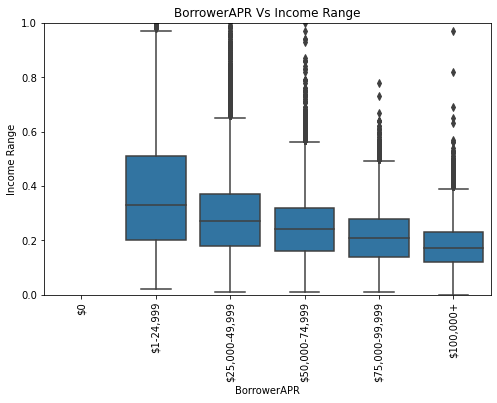

In [46]:
fig_size(8,5)
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
fig = sb.boxplot(data=df, x='IncomeRange', y='DebtToIncomeRatio', color=color, order=order)
fig.axes.set_ylim(0, 1) #Zooming in to see the boxplot clearly
plt.xticks(rotation=90)
pltlabels('BorrowerAPR Vs Income Range','BorrowerAPR', 'Income Range');

### Observation:
From the visualization above, borrowers with a high income have a lower debt to income ratio as they earn enough to settle off their loans quickly and easily. People within the highest range (100,000+) have the lowest ratio.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The plots above were helpful to preview some possible variables relationship to BorrowerAPR and Income Range. From the plots, I saw that
>- As the Income Range of borrowers increase, BorrowerAPR reduces.
>- BorrowerAPR is inverse proportional to the Prosper rating.
>- The higher the income of a borrower, the lower debt to income ratio.

<a id='multivariate'></a>
## Multivariate Exploration

### BorrowerAPR Vs IncomeRange and ProsperRating
### Visualization:

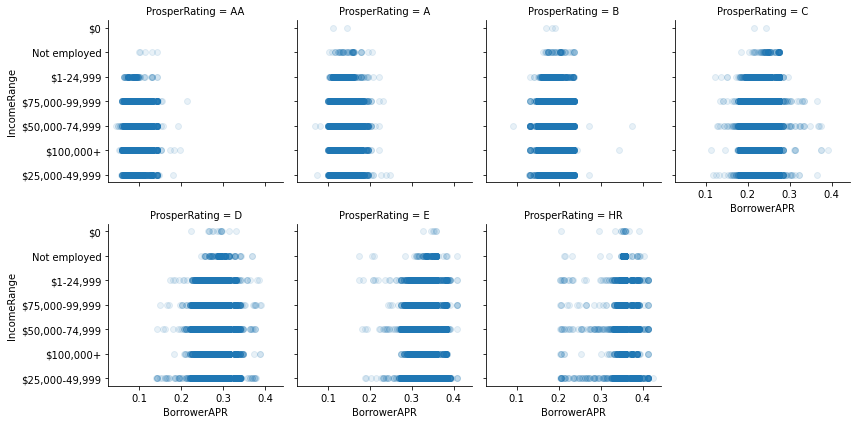

In [47]:
g = sb.FacetGrid(data = df, col = 'ProsperRating', col_wrap = 4, size = 3)

g.map(plt.scatter, 'BorrowerAPR', 'IncomeRange', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('IncomeRange')

plt.show()

### Observation:
This visualization helps to analyze BorrowerAPR vs IncomeRange on different Prosper ratings. The patterns shows the Higest rating AA of borrowers have the lowest APR. For low rating HR, the borrowers have the highest APR. This visualization classifies groups of borrowers in terms of APR received based on their rating and Income.

### Loan amount Vs IncomeRange and Home Owner

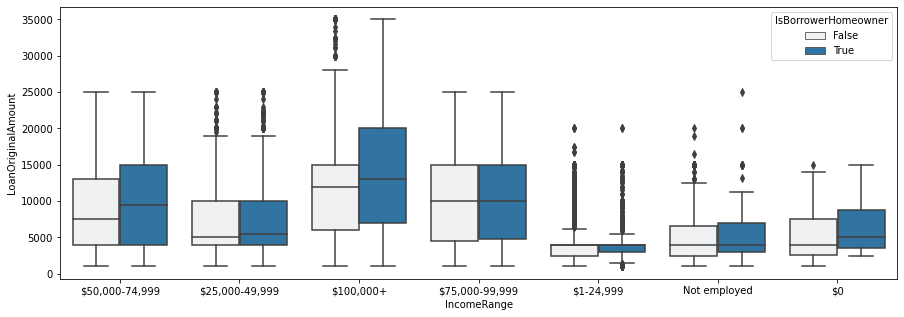

In [48]:
#plot boxplot
fig_size(15, 5)
sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = color);

### Observation:
From the plot above, it can be observed that irrespective of the borrowers income range, being a home owner is an important element to getting a higher loan amount as it gives advantage on collateral

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Having a collateral and a high income helps borrowers in getting higher loan amount. It is clearly visible that being a home owner is a very important element to get a higher loan amount. <br/>
Also patterns from the plot above shows that the Higest rating AA of borrowers have the lowest APR. For low rating HR, the borrowers have the highest APR. This confirms what was earlier stated that the Higher the ProsperRating, the Lower the BorrowerAPR and vice versa.


<a id='conclusion'></a>
## Conclusions:
>I was surprised that people with unverified occupation(other) were granted loans. Employed individuals make the highest count of borrowers. This makes sense because one would need a source of income to pay off borrowed loans. It would be difficult to get a loan without a job.<br/>.
Trying to understand the different motivations for people to request loans, I found surprising results. Rather than take loans to start businesses or purchase assets, the largest population of people collected loans to consolidate debt. Debt consolidation also accounts for the highest loan amounts collected from the platform on average. Asides business purposes, borrowers seem to depend on huge loans to finance weddings, child adoptions, boat acquisitions, and the purchase of engagement rings. 

<a id='references'></a>
## References:
To finish this project, I got some help from the following links:
 - Guide to Bivariate Analysis in Python [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/)
 - Effective Visualization [TowardsDataScience](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57)
 - Working with Missing Data [Geeksforgeeks](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=In%20order%20to%20check%20missing,null%20values%20in%20a%20series.)
 - Video tutorials from [YouTube](https://youtube.com)
 - [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html)
 - [Matplotlib documentation](https://matplotlib.org/stable/index.html)